In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster
import warnings
warnings.filterwarnings("ignore")
sns.set()

ModuleNotFoundError: No module named 'folium'

In [12]:
!pip install folium

     |████████████████████████████████| 102kB 7.8MB/s ta 0:00:011


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster
import warnings
warnings.filterwarnings("ignore")
sns.set()

In [14]:
!wget -O data.csv "https://opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0.csv"

--2020-09-16 14:20:56--  https://opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0.csv
Resolving opendata.arcgis.com (opendata.arcgis.com)... 34.224.12.157, 3.221.234.207, 52.45.166.77, ...
Connecting to opendata.arcgis.com (opendata.arcgis.com)|34.224.12.157|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘data.csv’

    [          <=>                          ] 84,923,797  38.6MB/s   in 2.1s   

2020-09-16 14:20:59 (38.6 MB/s) - ‘data.csv’ saved [84923797]



In [15]:
data = pd.read_csv("data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221389 entries, 0 to 221388
Data columns (total 40 columns):
X                  213918 non-null float64
Y                  213918 non-null float64
OBJECTID           221389 non-null int64
INCKEY             221389 non-null int64
COLDETKEY          221389 non-null int64
REPORTNO           221389 non-null object
STATUS             221389 non-null object
ADDRTYPE           217677 non-null object
INTKEY             71884 non-null float64
LOCATION           216801 non-null object
EXCEPTRSNCODE      100986 non-null object
EXCEPTRSNDESC      11779 non-null object
SEVERITYCODE       221388 non-null object
SEVERITYDESC       221389 non-null object
COLLISIONTYPE      195159 non-null object
PERSONCOUNT        221389 non-null int64
PEDCOUNT           221389 non-null int64
PEDCYLCOUNT        221389 non-null int64
VEHCOUNT           221389 non-null int64
INJURIES           221389 non-null int64
SERIOUSINJURIES    221389 non-null int64
FATALITIES     

In [16]:
map = folium.Map(location=[47.60, -122.33], zoom_start=12)
marker_cluster = MarkerCluster().add_to(map)
locations = data[['Y', 'X']][data['Y'].notna()].head(1000)
locationlist = locations.values.tolist()
for point in range(len(locations)):
    folium.Marker(locationlist[point]).add_to(marker_cluster)
map

In [17]:
data['WEATHER'].value_counts().to_frame('count')

,count
Clear,114694
Raining,34036
Overcast,28543
Unknown,15131
Snowing,919
Other,860
Fog/Smog/Smoke,577
Sleet/Hail/Freezing Rain,116
Blowing Sand/Dirt,56
Severe Crosswind,26


In [18]:

data['ROADCOND'].value_counts().to_frame('count')

,count
Dry,128535
Wet,48734
Unknown,15139
Ice,1232
Snow/Slush,1014
Other,136
Standing Water,119
Sand/Mud/Dirt,77
Oil,64


In [19]:
data['LIGHTCOND'].value_counts().to_frame('count')

,count
Daylight,119448
Dark - Street Lights On,50125
Unknown,13532
Dusk,6082
Dawn,2608
Dark - No Street Lights,1579
Dark - Street Lights Off,1239
Other,244
Dark - Unknown Lighting,23


In [20]:

data['SPEEDING'].value_counts().to_frame()

,SPEEDING
Y,9928


In [21]:
data['SEVERITYCODE'].value_counts().to_frame('count')

,count
1,137596
2,58747
0,21594
2b,3102
3,349


In [22]:

data['UNDERINFL'].value_counts().to_frame('count')

,count
N,103874
0,81676
Y,5399
1,4230


In [23]:

data['PERSONCOUNT'].describe()

count    221389.000000
mean          2.227161
std           1.470190
min           0.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          93.000000
Name: PERSONCOUNT, dtype: float64

In [24]:
data['VEHCOUNT'].describe()

count    221389.000000
mean          1.731057
std           0.829259
min           0.000000
25%           2.000000
50%           2.000000
75%           2.000000
max          15.000000
Name: VEHCOUNT, dtype: float64

In [25]:

data['PEDCOUNT'].describe()

count    221389.000000
mean          0.038136
std           0.201815
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           6.000000
Name: PEDCOUNT, dtype: float64

In [26]:

data['PEDCYLCOUNT'].describe()

count    221389.000000
mean          0.027350
std           0.164508
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           2.000000
Name: PEDCYLCOUNT, dtype: float64

In [27]:

data.isna().sum()

X                    7471
Y                    7471
OBJECTID                0
INCKEY                  0
COLDETKEY               0
REPORTNO                0
STATUS                  0
ADDRTYPE             3712
INTKEY             149505
LOCATION             4588
EXCEPTRSNCODE      120403
EXCEPTRSNDESC      209610
SEVERITYCODE            1
SEVERITYDESC            0
COLLISIONTYPE       26230
PERSONCOUNT             0
PEDCOUNT                0
PEDCYLCOUNT             0
VEHCOUNT                0
INJURIES                0
SERIOUSINJURIES         0
FATALITIES              0
INCDATE                 0
INCDTTM                 0
JUNCTIONTYPE        11972
SDOT_COLCODE            1
SDOT_COLDESC            1
INATTENTIONIND     191201
UNDERINFL           26210
WEATHER             26420
ROADCOND            26339
LIGHTCOND           26509
PEDROWNOTGRNT      216197
SDOTCOLNUM          94184
SPEEDING           211461
ST_COLCODE           9413
ST_COLDESC          26230
SEGLANEKEY              0
CROSSWALKKEY

In [28]:
data.duplicated().sum()

0

In [29]:
data_clean = data[['X', 'Y', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
                   'SPEEDING', 'SEVERITYCODE', 'UNDERINFL',
                   'SERIOUSINJURIES', 'FATALITIES', 'INJURIES',
                   'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT']]
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221389 entries, 0 to 221388
Data columns (total 15 columns):
X                  213918 non-null float64
Y                  213918 non-null float64
WEATHER            194969 non-null object
ROADCOND           195050 non-null object
LIGHTCOND          194880 non-null object
SPEEDING           9928 non-null object
SEVERITYCODE       221388 non-null object
UNDERINFL          195179 non-null object
SERIOUSINJURIES    221389 non-null int64
FATALITIES         221389 non-null int64
INJURIES           221389 non-null int64
PERSONCOUNT        221389 non-null int64
PEDCOUNT           221389 non-null int64
PEDCYLCOUNT        221389 non-null int64
VEHCOUNT           221389 non-null int64
dtypes: float64(2), int64(7), object(6)
memory usage: 25.3+ MB


In [30]:
data_clean['SPEEDING'] = data_clean['SPEEDING'].map({'Y': 1})
data_clean['SPEEDING'].replace(np.nan, 0, inplace=True)
data_clean['SPEEDING'].value_counts().to_frame()

,SPEEDING
0.0,211461
1.0,9928


In [31]:
data_clean.replace('Unknown', np.nan, inplace=True)
data_clean.replace('Other', np.nan, inplace=True)
data_clean['SEVERITYCODE'].replace('0', np.nan, inplace=True)

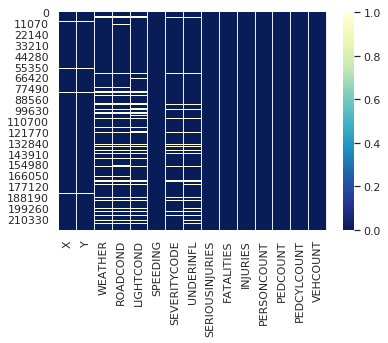

In [32]:
sns.heatmap(data_clean.isnull(), cmap='YlGnBu_r')
plt.show()

In [33]:
data_clean.dropna(axis=0, inplace=True)

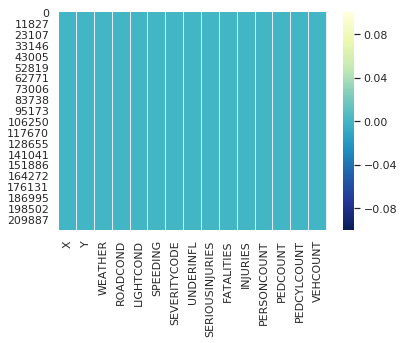

In [34]:
sns.heatmap(data_clean.isnull(), cmap='YlGnBu_r')
plt.show()

In [35]:
data_clean['UNDERINFL'] = data_clean['UNDERINFL'].map({'N': 0, '0': 0, 'Y': 1, '1': 1})

In [36]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171380 entries, 0 to 221388
Data columns (total 15 columns):
X                  171380 non-null float64
Y                  171380 non-null float64
WEATHER            171380 non-null object
ROADCOND           171380 non-null object
LIGHTCOND          171380 non-null object
SPEEDING           171380 non-null float64
SEVERITYCODE       171380 non-null object
UNDERINFL          171380 non-null int64
SERIOUSINJURIES    171380 non-null int64
FATALITIES         171380 non-null int64
INJURIES           171380 non-null int64
PERSONCOUNT        171380 non-null int64
PEDCOUNT           171380 non-null int64
PEDCYLCOUNT        171380 non-null int64
VEHCOUNT           171380 non-null int64
dtypes: float64(3), int64(8), object(4)
memory usage: 20.9+ MB


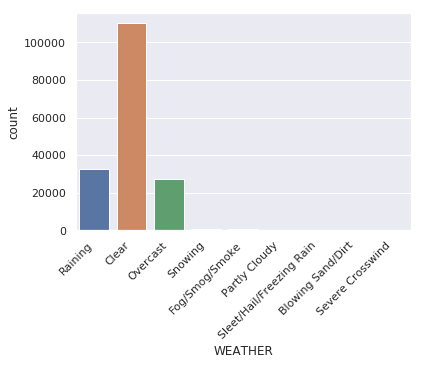

In [37]:
ax = sns.countplot(data_clean['WEATHER'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, 
                   horizontalalignment='right')
plt.show()

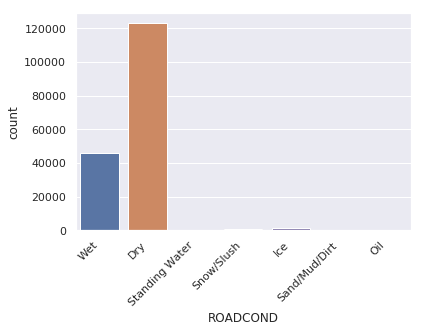

In [38]:
ax = sns.countplot(data_clean['ROADCOND'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, 
                   horizontalalignment='right')
plt.show()

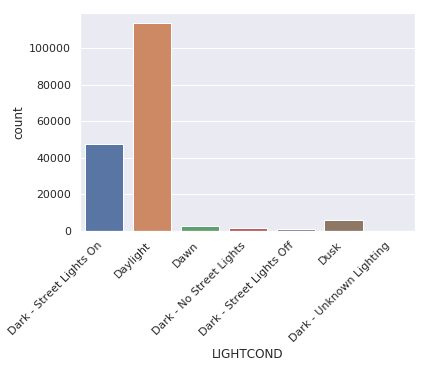

In [39]:
ax = sns.countplot(data_clean['LIGHTCOND'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, 
                   horizontalalignment='right')
plt.show()

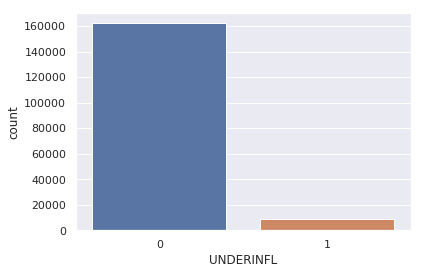

In [40]:
sns.countplot(data_clean['UNDERINFL'])

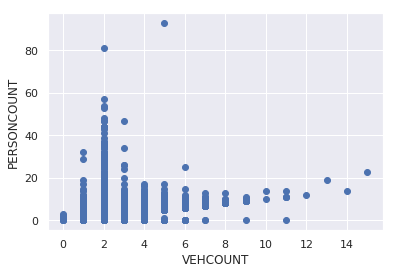

In [41]:
ax = plt.scatter(data_clean['VEHCOUNT'], data_clean['PERSONCOUNT'])
plt.xlabel('VEHCOUNT')
plt.ylabel('PERSONCOUNT')
plt.show()

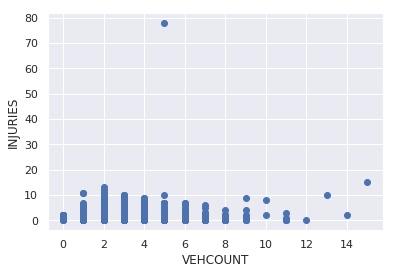

In [42]:
ax = plt.scatter(data_clean['VEHCOUNT'], data_clean['INJURIES'])
plt.xlabel('VEHCOUNT')
plt.ylabel('INJURIES')
plt.show()

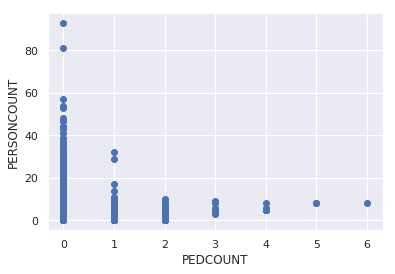

In [43]:
ax = plt.scatter(data_clean['PEDCOUNT'], data_clean['PERSONCOUNT'])
plt.xlabel('PEDCOUNT')
plt.ylabel('PERSONCOUNT')
plt.show()

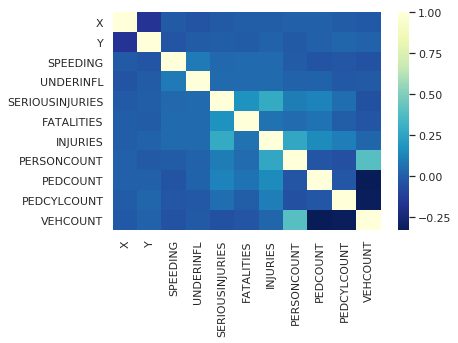

In [44]:

sns.heatmap(data_clean.corr(), cmap='YlGnBu_r')
plt.show()

In [45]:

data_clean = pd.concat([data_clean.drop(['WEATHER', 'ROADCOND', 'LIGHTCOND'], axis=1), 
           pd.get_dummies(data_clean['ROADCOND']),
           pd.get_dummies(data_clean['LIGHTCOND']),
           pd.get_dummies(data_clean['WEATHER'])], axis=1)

In [46]:

data_clean = data_clean.sample(frac=1).reset_index(drop=True)

In [47]:
data_clean.head(5).T

,0,1,2,3,4
X,-122.304,-122.314,-122.334,-122.35,-122.334
Y,47.6626,47.5786,47.5956,47.652,47.618
SPEEDING,0,0,0,0,0
SEVERITYCODE,1,1,1,2,2
UNDERINFL,0,0,0,0,0
SERIOUSINJURIES,0,0,0,0,0
FATALITIES,0,0,0,0,0
INJURIES,0,0,0,1,1
PERSONCOUNT,2,1,2,2,3
PEDCOUNT,0,0,0,0,1


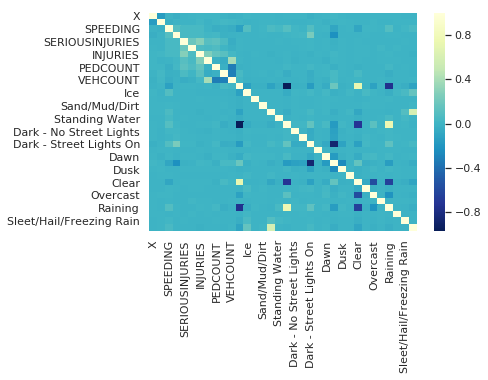

In [48]:
sns.heatmap(data_clean.corr(), cmap='YlGnBu_r')
plt.show()

In [49]:
from sklearn import preprocessing
x = data_clean.drop(['SEVERITYCODE'], axis=1)
y = data_clean[['SEVERITYCODE']]
data_clean_scaled = preprocessing.StandardScaler().fit(x).transform(x)
data_clean_scaled[0:3]

array([[ 8.68131659e-01,  7.69186106e-01, -2.36267174e-01,
        -2.38570921e-01, -1.06347302e-01, -4.12497842e-02,
        -5.79735173e-01, -3.59510163e-01, -2.10222342e-01,
        -1.85561250e-01,  5.71671010e-02,  6.26521760e-01,
        -7.95237227e-02, -1.69114196e-02, -1.83995596e-02,
        -6.97610782e-02, -2.39197797e-02, -6.07483112e-01,
        -8.99332942e-02, -8.07406835e-02, -6.16372953e-01,
        -9.96015123e-03, -1.20129048e-01,  7.13627689e-01,
        -1.85549573e-01, -1.56566123e-02, -1.34227426e+00,
        -5.64819686e-02,  2.30318816e+00, -7.63893125e-03,
        -4.83117153e-01, -1.20787395e-02, -2.52273326e-02,
        -6.95496176e-02],
       [ 5.48631055e-01, -7.08891977e-01, -2.36267174e-01,
        -2.38570921e-01, -1.06347302e-01, -4.12497842e-02,
        -5.79735173e-01, -1.05983925e+00, -2.10222342e-01,
        -1.85561250e-01, -1.64493466e+00,  6.26521760e-01,
        -7.95237227e-02, -1.69114196e-02, -1.83995596e-02,
        -6.97610782e-02, -2.39

In [50]:
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_clean_scaled, y, 
                                                    test_size=0.2, random_state=42)

In [51]:

from sklearn.tree import DecisionTreeClassifier
dTreeModel = DecisionTreeClassifier(criterion='entropy', max_depth=5)
dTreeModel.fit(x_train, y_train)
dTreeModel

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [52]:
yHat = dTreeModel.predict(x_test)

In [53]:
print(classification_report(y_test, yHat))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     22512
           2       1.00      1.00      1.00     11124
          2b       1.00      1.00      1.00       578
           3       1.00      1.00      1.00        62

   micro avg       1.00      1.00      1.00     34276
   macro avg       1.00      1.00      1.00     34276
weighted avg       1.00      1.00      1.00     34276



In [54]:
from sklearn.ensemble import RandomForestClassifier
rfcModel = RandomForestClassifier(n_estimators=75)
rfcModel.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=75, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [55]:
yHat = rfcModel.predict(x_test)

In [56]:
print(classification_report(y_test, yHat))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     22512
           2       1.00      1.00      1.00     11124
          2b       1.00      1.00      1.00       578
           3       1.00      1.00      1.00        62

   micro avg       1.00      1.00      1.00     34276
   macro avg       1.00      1.00      1.00     34276
weighted avg       1.00      1.00      1.00     34276



In [57]:

from sklearn.linear_model import LogisticRegression
logRegModel = LogisticRegression(C=0.01)
logRegModel.fit(x_train, y_train)
logRegModel

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [58]:
yHat = logRegModel.predict(x_test)

In [59]:
print(classification_report(y_test, yHat))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     22512
           2       1.00      1.00      1.00     11124
          2b       1.00      0.98      0.99       578
           3       1.00      0.98      0.99        62

   micro avg       1.00      1.00      1.00     34276
   macro avg       1.00      0.99      0.99     34276
weighted avg       1.00      1.00      1.00     34276



In [60]:

import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, input_dim=x_train.shape[1], activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(4, activation='sigmoid')
])

model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)

Instructions for updating:
Colocations handled automatically by placer.


In [61]:
num_epochs = 10
history = model.fit(x_train, tf.keras.utils.to_categorical(
    y_train['SEVERITYCODE'].map({
        '1': 0,
        '2': 1,
        '2b': 2,
        '3': 3
    }), dtype='float32'
), epochs=num_epochs, batch_size=50, validation_split = 0.2)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 109683 samples, validate on 27421 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
109683/109683 [==============================] - 2188s 20ms/sample - loss: nan - acc: 0.8466 - val_loss: nan - val_acc: 0.6575
Epoch 2/10
109683/109683 [==============================] - 2173s 20ms/sample - loss: nan - acc: 0.6583 - val_loss: nan - val_acc: 0.6575
Epoch 3/10
109683/109683 [==============================] - 2177s 20ms/sample - loss: nan - acc: 0.6583 - val_loss: nan - val_acc: 0.6575
Epoch 4/10
109683/109683 [==============================] - 2179s 20ms/sample - loss: nan - acc: 0.6583 - val_loss: nan - val_acc: 0.6575
Epoch 5/10
109683/109683 [==============================] - 2178s 20ms/sample - loss: nan - acc: 0.6583 - val_loss: nan - val_acc: 0.6575
Epoch 6/10
109683/109683 [==============================] - 2212s 20ms/sample - loss: nan - acc:

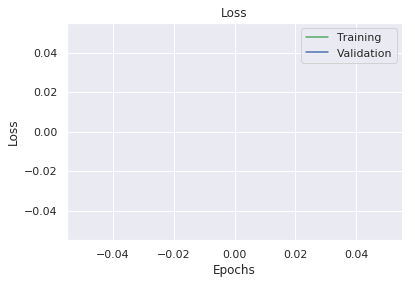

In [66]:
loss_train = history.history['loss']
loss_validation = history.history['val_loss']
epochs = range(1, num_epochs + 1)
plt.plot(epochs, loss_train, 'g', label='Training')
plt.plot(epochs, loss_validation, 'b', label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend()
plt.show()

In [65]:
acc_train = history.history['accuracy']
acc_validation = history.history['val_accuracy']
epochs = range(1, num_epochs + 1)
plt.plot(epochs, acc_train, 'g', label='Training')
plt.plot(epochs, acc_validation, 'b', label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()

KeyError: 'accuracy'

In [69]:
yHat = model.predict(x_test)
yPred = [np.argmax(y) for y in yHat]

In [68]:
print(classification_report(y_test.SEVERITYCODE.map({
        '1': 0,
        '2': 1,
        '2b': 2,
        '3': 3
}), yPred))

              precision    recall  f1-score   support

           0       0.66      1.00      0.79     22512
           1       0.00      0.00      0.00     11124
           2       0.00      0.00      0.00       578
           3       0.00      0.00      0.00        62

   micro avg       0.66      0.66      0.66     34276
   macro avg       0.16      0.25      0.20     34276
weighted avg       0.43      0.66      0.52     34276



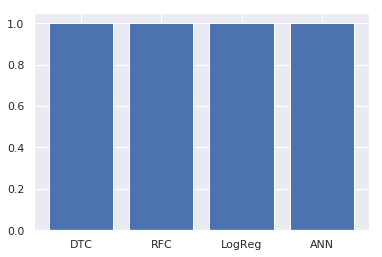

In [70]:
plt.bar(['DTC', 'RFC', 'LogReg', 'ANN'], [1.,1.,1.,1.])
plt.show()